In [123]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("/Users/ishanjoshi/Netflix Analysis/netflix_titles2.csv")

In [49]:
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,...,Poland.1,Greece.1,Argentina.1,Somalia.1,Sudan.1,Israel.1,Malta.1,Bermuda.1,Bangladesh.1,Malaysia.1
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993.0,TV-MA,...,0,0,0,0,0,0,0,0,0,0
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021.0,TV-14,...,0,0,0,0,0,0,0,0,0,0
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021.0,PG-13,...,0,0,0,0,0,0,0,0,0,0
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021.0,TV-MA,...,0,0,0,0,0,0,0,0,0,0
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998.0,TV-14,...,0,0,0,0,0,0,0,0,0,0


Content Type of Netflix

In [79]:
content_type_counts = df['type'].value_counts()

print(content_type_counts)

type
Movie      5185
TV Show     147
Name: count, dtype: int64


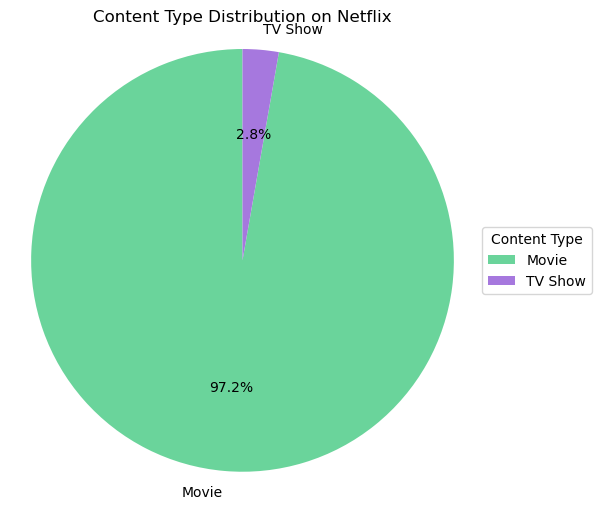

In [81]:
content_type_counts = df['type'].value_counts()

labels = content_type_counts.index
sizes = content_type_counts.values


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#6ad49b', '#a678de'])

plt.legend(labels, title="Content Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Content Type Distribution on Netflix')
plt.axis('equal')  

plt.show()

Growth in Content over the years

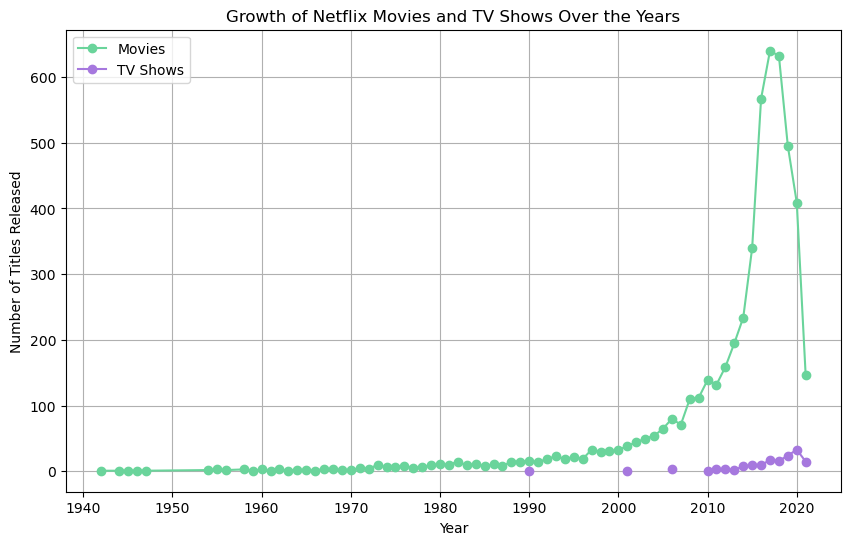

In [92]:
content_growth_by_type = df.groupby(['release_year', 'type']).size().unstack()

plt.figure(figsize=(10, 6))
plt.plot(content_growth_by_type.index, content_growth_by_type['Movie'], marker='o', label='Movies', color='#6ad49b')
plt.plot(content_growth_by_type.index, content_growth_by_type['TV Show'], marker='o', label='TV Shows', color='#a678de')

plt.title('Growth of Netflix Movies and TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.legend()
plt.grid(True)

plt.show()

Content added by month on Netflix

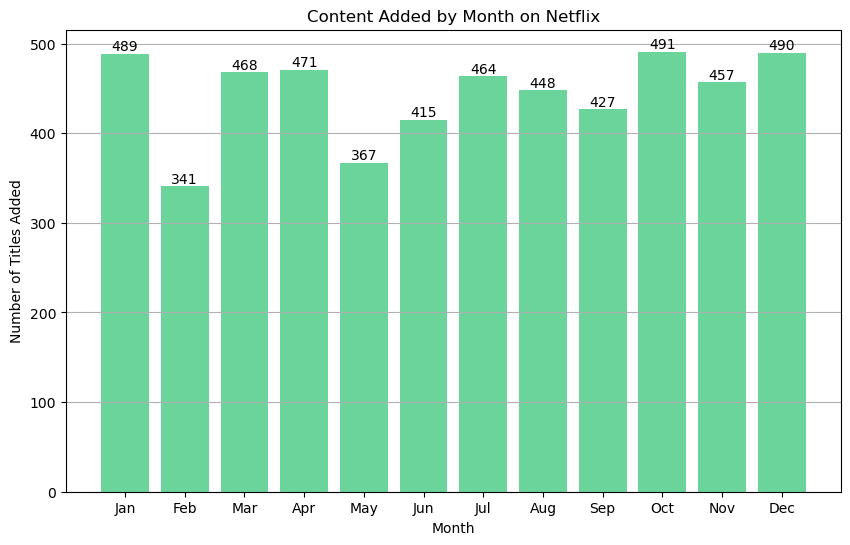

In [107]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month

# Grouping the data by month and counting the number of titles added each month
content_by_month = df.groupby('month_added').size()


plt.figure(figsize=(10, 6))
bars = plt.bar(content_by_month.index, content_by_month.values, color='#6ad49b')

# Adding labels, title, and adjusting x-axis labels to show month names
plt.title('Content Added by Month on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y')

# Add numbers exactly on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.show()

Oldest movies

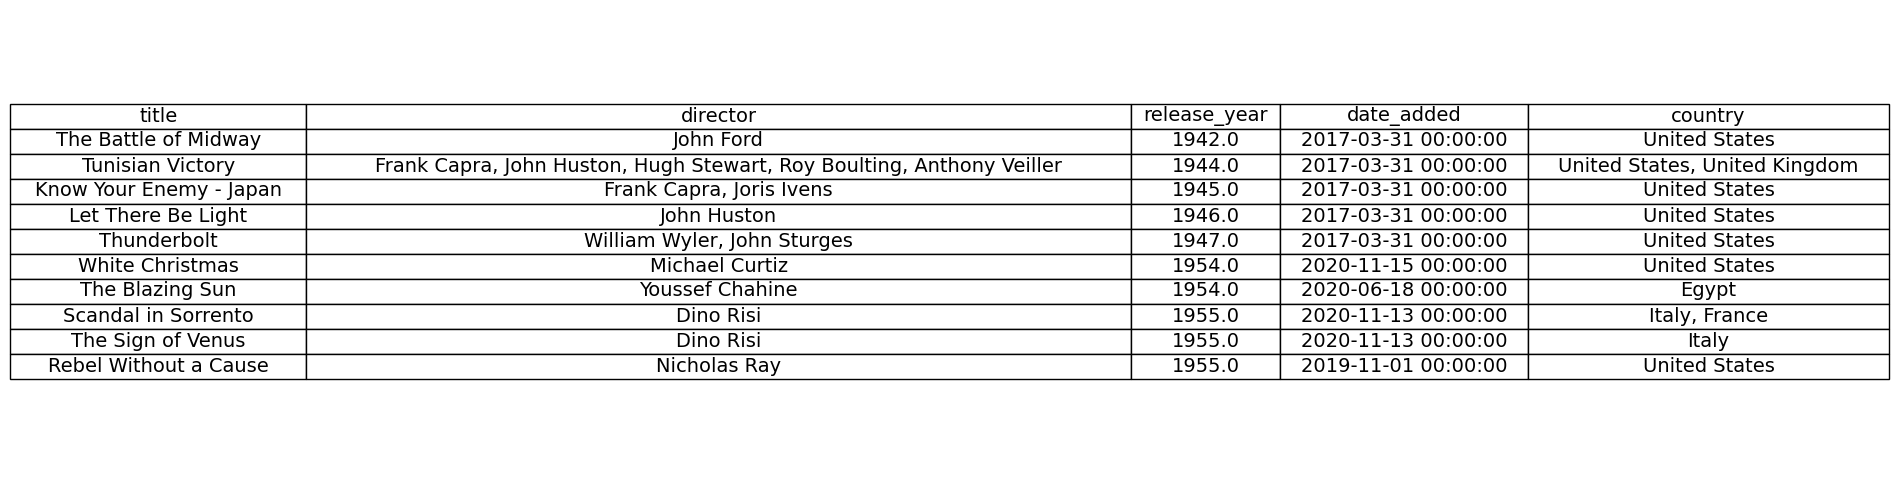

In [119]:
oldest_movies_table = oldest_movies[['title', 'director', 'release_year', 'date_added', 'country']]

fig, ax = plt.subplots(figsize=(16, 6))  # Increase figure size further for better clarity
ax.axis('tight')
ax.axis('off')

# Create the table with adjusted column widths
table = ax.table(cellText=oldest_movies_table.values, colLabels=oldest_movies_table.columns, cellLoc='center', loc='center')

# Adjust the font size and scale for better readability
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)

# Adjust column widths
table.auto_set_column_width([0, 1, 2, 3, 4])

# Show the table
plt.show()

Netflix Content by Different Countries

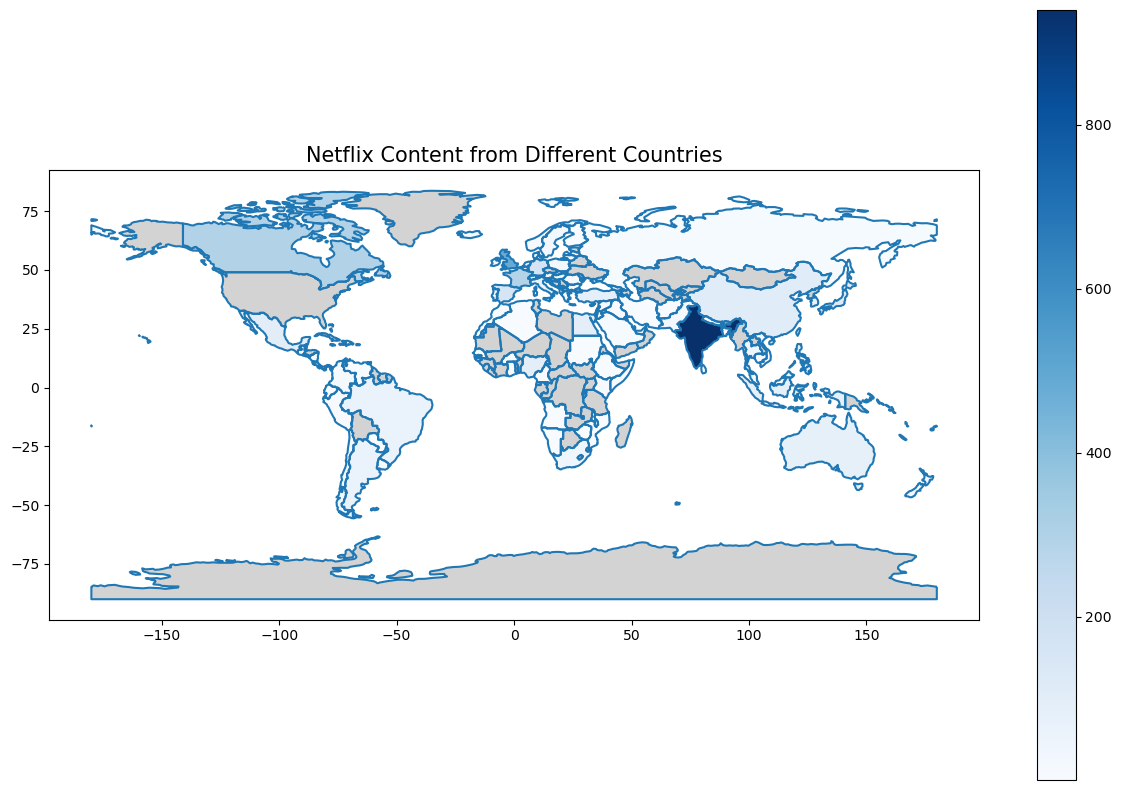

In [140]:
shapefile_path = '/Users/ishanjoshi/Netflix Analysis/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Clean the country column (handle multiple countries in a single row by splitting them)
df['country'] = df['country'].fillna('Unknown')
country_list = df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country_counts = country_list.value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Merge the country data with the world map data using 'ADMIN' as the column for country names
merged = world.merge(country_counts, how='left', left_on='ADMIN', right_on='country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)  # Plot country boundaries
merged.plot(column='count', ax=ax, legend=True, cmap='Blues', missing_kwds={'color': 'lightgrey'})

# Add a title
plt.title('Netflix Content from Different Countries', fontsize=15)

# Show the map
plt.show()

Top 20 countries by Netflix Content

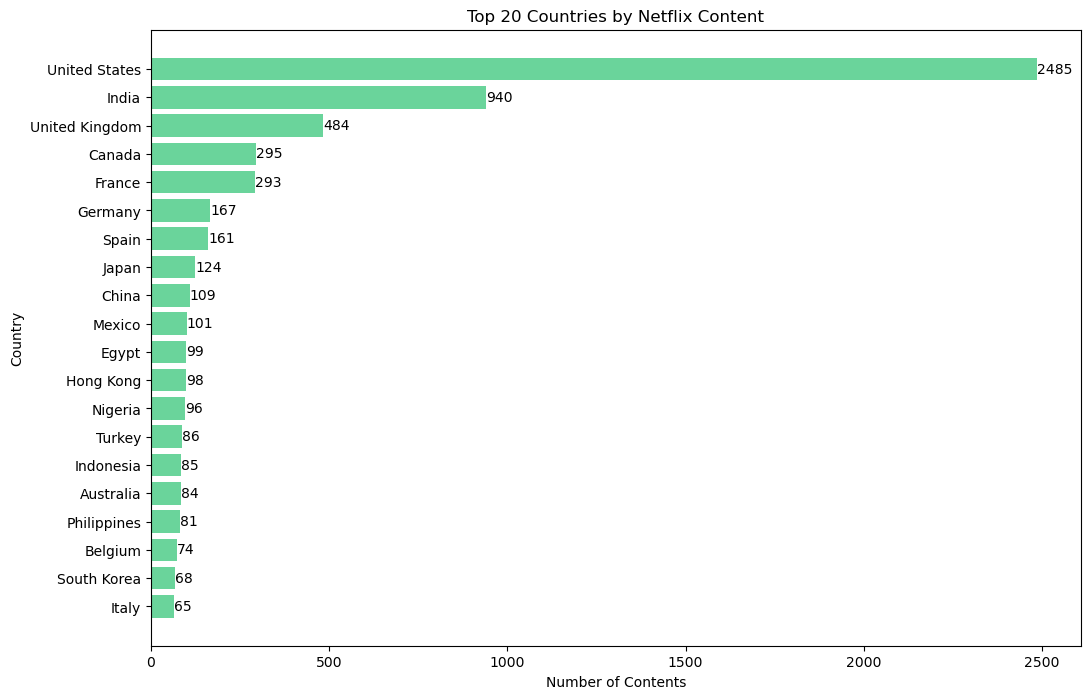

In [148]:
df['country'] = df['country'].fillna('Unknown')
country_list = df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country_counts = country_list.value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Sorting the country_counts dataframe
country_counts_sorted = country_counts.sort_values(by='count', ascending=False)

# Selecting the top 20 countries for the plot
top_countries = country_counts_sorted.head(20)

# Plotting the bar graph with numbers next to bars
plt.figure(figsize=(12, 8))
bars = plt.barh(top_countries['country'], top_countries['count'], color='#6ad49b')

# Adding labels and title
plt.xlabel('Number of Contents')
plt.ylabel('Country')
plt.title('Top 20 Countries by Netflix Content')

# Adding the count labels next to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left')

# Invert the y-axis to show the highest count on top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

Ratings by content type

In [164]:
df_filtered = df[['release_year', 'rating', 'type']].dropna()

# Convert the release_year to an integer type if necessary
df_filtered['release_year'] = df_filtered['release_year'].astype(int)

# Group the data by release_year, type (Movie/TV Show), and rating, then count occurrences
df_grouped = df_filtered.groupby(['release_year', 'type', 'rating']).size().unstack().fillna(0)

# Inspect the structure of the grouped data
print(df_grouped.head())

rating                G  NC-17   NR   PG  PG-13    R  TV-14  TV-G  TV-MA  \
release_year type                                                          
1942         Movie  0.0    0.0  0.0  0.0    0.0  0.0    1.0   0.0    0.0   
1944         Movie  0.0    0.0  0.0  0.0    0.0  0.0    1.0   0.0    0.0   
1945         Movie  0.0    0.0  0.0  0.0    0.0  0.0    1.0   0.0    0.0   
1946         Movie  0.0    0.0  0.0  0.0    0.0  0.0    0.0   0.0    0.0   
1947         Movie  0.0    0.0  0.0  0.0    0.0  0.0    0.0   0.0    0.0   

rating              TV-PG  TV-Y  TV-Y7  TV-Y7-FV   UR  
release_year type                                      
1942         Movie    0.0   0.0    0.0       0.0  0.0  
1944         Movie    0.0   0.0    0.0       0.0  0.0  
1945         Movie    0.0   0.0    0.0       0.0  0.0  
1946         Movie    1.0   0.0    0.0       0.0  0.0  
1947         Movie    1.0   0.0    0.0       0.0  0.0  


<Figure size 1200x800 with 0 Axes>

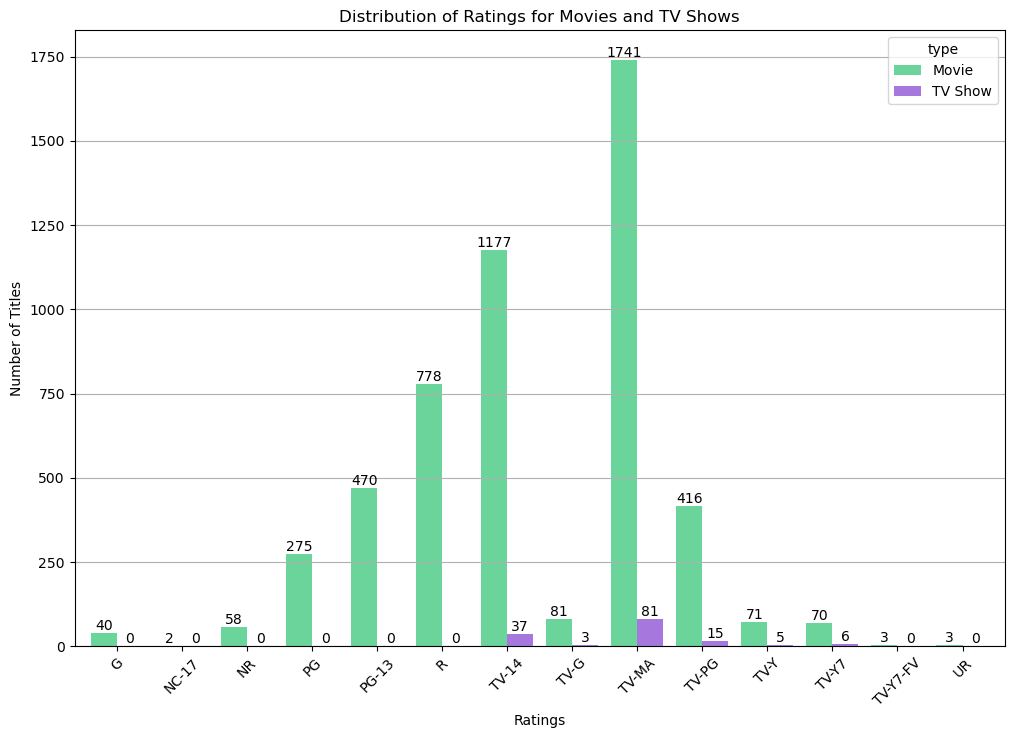

In [179]:
df_filtered = df[['release_year', 'rating', 'type']].dropna()

# Group the data by rating and type (Movie/TV Show), and count the occurrences
df_grouped_ratings = df_filtered.groupby(['rating', 'type']).size().unstack().fillna(0)

# Plot the graph with numbers on top of bars
plt.figure(figsize=(12, 8))
ax = df_grouped_ratings.plot(kind='bar', width=0.8, figsize=(12, 8), color=['#6ad49b', '#a678de'])

# Adding labels and title
plt.xlabel('Ratings')
plt.ylabel('Number of Titles')
plt.title('Distribution of Ratings for Movies and TV Shows')

# Adding the count labels on top of the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Show the plot with counts on top
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()